# showbags data
Extracted using playwright on April 12th from [the royal easter show website](https://www.eastershow.com.au/explore/showbags/)

`data/showbags/showbags.csv`

In [1]:
import pandas as pd
data = pd.read_csv('../data/showbags/showbags.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    408 non-null    object 
 1   name                  408 non-null    object 
 2   price                 408 non-null    object 
 3   stand_numbers         408 non-null    object 
 4   image_url             408 non-null    object 
 5   included_items        408 non-null    object 
 6   retail_value          408 non-null    object 
 7   distributor           408 non-null    object 
 8   price_numeric         408 non-null    float64
 9   retail_value_numeric  408 non-null    float64
dtypes: float64(2), object(8)
memory usage: 32.0+ KB


In [2]:
data.head()

,id,name,price,stand_numbers,image_url,included_items,retail_value,distributor,price_numeric,retail_value_numeric
0,217dd2a7-fb42-46db-98e0-fceedec81e6c,Fyna Licorice Bag,$15,"Stand Numbers: 1,14",https://www.eastershow.com.au/contentassets/9d...,"['1x 200g Milk Chocolate Bites $3.50', '1x 230...",Total Retail Value: $16.00,HUNTER LEISURE P/LThe content of this bag is s...,15.0,16.00
1,a58c3b5b-9869-4930-8fbe-cf59ed6846b2,Cadbury Dairy Milk Showbag,$6.00,"Stand Numbers: 003, 004, 010, 012, 013, 016, 0...",https://www.eastershow.com.au/contentassets/8b...,"['12x 12g Bite Size Dairy Milk $0.58', '1x 15...",Total Retail Value: $8.70,BENSONS TRADING CO PTY LTDThe content of this ...,6.0,8.70
2,c2ee5ae9-c109-44e0-b6e9-846306c6f278,Cadbury Freddo Showbag,$6.00,"Stand Numbers: 003, 004, 010, 012, 013, 016, 0...",https://www.eastershow.com.au/contentassets/d0...,"['5x 12g Dairy Milk Freddo $0.70', '1x 12g Mil...",Total Retail Value: $7.22,BENSONS TRADING CO PTY LTDThe content of this ...,6.0,7.22
3,adc68bf8-a7d7-4ecb-9dc6-aab0186e6577,Cadbury Twirl Showbag,$10.00,"Stand Numbers: 003, 004, 010, 012, 013, 016, 0...",https://www.eastershow.com.au/contentassets/85...,"['8x 14g Bite Size Twirl $0.58', '6x 12g Bite ...",Total Retail Value: $14.12,BENSONS TRADING CO PTY LTDThe content of this ...,10.0,14.12
4,6011c150-1ba9-4c13-bcfc-7997a876af5e,Bag of Bubbles,$15.00,Stand Numbers: 11,https://www.eastershow.com.au/contentassets/f3...,"['1x Choice of Big Eye Fish, Dinosaur or Unico...",Total Retail Value: $30.80,SHOWBAGS AUSTRALIA PTY LDThe content of this b...,15.0,30.80


An explanation of the features
- Name - product name of thee showbag
- Location (Stand Numbers) - where to go in the show
- price_numeric - how much it costs
- included_items - what's in there
- retail_value_numeric - the total value of what's in the showbag

If we want kids to be able to find the right showbag with natural language, we may need to extract details from the image - this could be a good use for mistral

In [5]:
data.iloc[0]

id                                   217dd2a7-fb42-46db-98e0-fceedec81e6c
name                                                    Fyna Licorice Bag
price                                                                 $15
stand_numbers                                         Stand Numbers: 1,14
image_url               https://www.eastershow.com.au/contentassets/9d...
included_items          ['1x 200g Milk Chocolate Bites $3.50', '1x 230...
retail_value                                   Total Retail Value: $16.00
distributor             HUNTER LEISURE P/LThe content of this bag is s...
price_numeric                                                        15.0
retail_value_numeric                                                 16.0
Name: 0, dtype: object

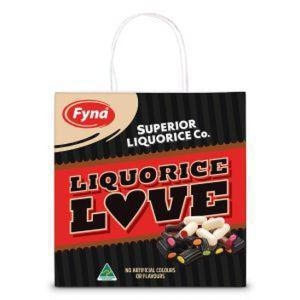

In [6]:
import requests
from IPython.display import Image, display


def show_image(image_url):
    try:
        # Fetch the image content
        response = requests.get(image_url)
        response.raise_for_status() # Raise an exception for bad status codes (like 404)

        # Get the image content as bytes
        image_data = response.content

        # Create an Image object from the bytes data
        img = Image(data=image_data)

        # Display the image
        display(img)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching image: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

show_image(data.iloc[0]['image_url'])




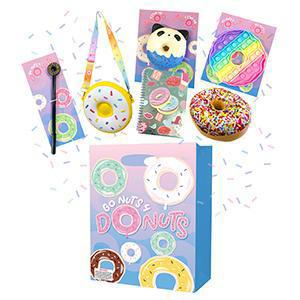

In [7]:
show_image(data.iloc[20]['image_url'])

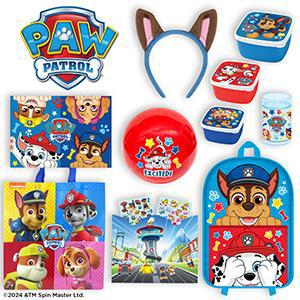

In [8]:
show_image(data.iloc[99]['image_url'])

In [12]:
# what's the best value showbag?
data['value_per_item'] = data['retail_value_numeric'] / data['included_items'].str.len()
data['retail_discount'] = (data['retail_value_numeric'] - data['price_numeric'])


In [ ]:
# so much value
data.sort_values(by='retail_discount', ascending=False).head(10)

,id,name,price,stand_numbers,image_url,included_items,retail_value,distributor,price_numeric,retail_value_numeric,value_per_item,retail_discount
63,04e4313f-c423-4f29-8b2a-75dc9c494d17,Women's Essential,$32,Stand Numbers: 6 - I LOVE SHOWBAGS,https://www.eastershow.com.au/contentassets/98...,"[""1x Women's Essential Tote Bag with Shoulder ...",Total Retail Value: $558.87,C&C MARKETINGThe content of this bag is subjec...,32.0,558.87,0.428253,526.87
111,14e136d8-6efa-43f6-98df-743c6b052815,Men's Essential,$35,Stand Numbers: 6 - I LOVE SHOWBAGS,https://www.eastershow.com.au/contentassets/80...,"[""1x Men's Essential Weekender With Shoulder S...",Total Retail Value: $525.86,C&C MARKETINGThe content of this bag is subjec...,35.0,525.86,0.592852,490.86
389,f8379f1d-e900-48f0-b60a-533502b8194c,BUBS & TOTS,$25,Stand Numbers: 6 - I LOVE SHOWBAGS,https://www.eastershow.com.au/contentassets/c8...,"['1x BUBS & TOTS Baby Bag $29.95', '1x Grants...",Total Retail Value: $495.11,C&C MARKETINGThe content of this bag is subjec...,25.0,495.11,0.417462,470.11
362,f864c183-0f1d-4be6-921a-74a71eee34eb,The Australian Women's Weekly Showbag,$25,Stand Numbers: 5 Emporium Showbags,https://www.eastershow.com.au/contentassets/bd...,"[""1x The Australian Women's Weekly Canvas Tote...",Total Retail Value: $421.51,CHICANE MARKETING PTY LTDThe content of this b...,25.0,421.51,0.227474,396.51
107,4255648f-06bc-48ab-bb57-2d512114a26c,Better Homes and Gardens Showbag,$32,Stand Numbers: 5 Emporium Showbags,https://www.eastershow.com.au/contentassets/96...,['1x Better Homes and Gardens Canvas Tote Bags...,Total Retail Value: $396.72,CHICANE MARKETING PTY LTDThe content of this b...,32.0,396.72,0.211359,364.72
147,81cfdcc7-a9d9-4fd3-b7f1-d7414e064bdc,Tilly & Co.,$30,Stand Numbers: 6 - I LOVE SHOWBAGS,https://www.eastershow.com.au/contentassets/31...,['1x Tilly & Co. Tote Bag (choice of two colou...,Total Retail Value: $355.35,C&C MARKETINGThe content of this bag is subjec...,30.0,355.35,0.380868,325.35
399,9c403118-3f6f-4f0e-bab1-3bc043d9e0f8,marie claire Showbag,$32,Stand Numbers: 5 Emporium Showbags,https://www.eastershow.com.au/contentassets/a8...,['1x marie claire Neoprene Tote Bag (Choose Co...,Total Retail Value: $304.19,CHICANE MARKETING PTY LTDThe content of this b...,32.0,304.19,0.154804,272.19
292,6c2f0647-490c-4968-99c0-3b3cf130e108,Rural Aid - For Our Mates In the Bush,$18,Stand Numbers: 6 - I LOVE SHOWBAGS,https://www.eastershow.com.au/contentassets/5d...,"['1x Rural Aid Carry All Tote Bag $16.95', '2...",Total Retail Value: $273.22,C&C MARKETINGThe content of this bag is subjec...,18.0,273.22,0.234122,255.22
160,905b82c8-3330-4483-b033-8b2d0906db33,InStyle Showbag,$32,Stand Numbers: 5 Emporium Showbags,https://www.eastershow.com.au/contentassets/7f...,['1x InStyle Linen Look Oversized Striped Tote...,Total Retail Value: $283.07,CHICANE MARKETING PTY LTDThe content of this b...,32.0,283.07,0.171870,251.07
306,9ae70420-3bbe-47ac-9eeb-7dd2049e9632,The Kitty showbag - for the cat lover!,$26,Stand Numbers: 6 - I LOVE SHOWBAGS,https://www.eastershow.com.au/contentassets/cd...,"['1x The Kitty Tote Bag $4.95', '1x Applaws C...",Total Retail Value: $260.47,C&C MARKETINGThe content of this bag is subjec...,26.0,260.47,0.515782,234.47


In [18]:
# show_image(
data.sort_values(by='retail_discount', ascending=False).head(10)['image_url'].to_list()[2]
# )


'https://www.eastershow.com.au/contentassets/c8bffd364ff5407e8680918bb9c71e2d/bubs--tots-//ShowBagImage-32450840-300-300-75-0,0'

# Showguide
This is another unstructured data source with the session schedules burried in there.

PDF Information:
• Filename: show-guide-2025.pdf
• Total pages: 32
• Displaying: Page 2 of 32
• Page dimensions: 1190.6 x 841.9 points


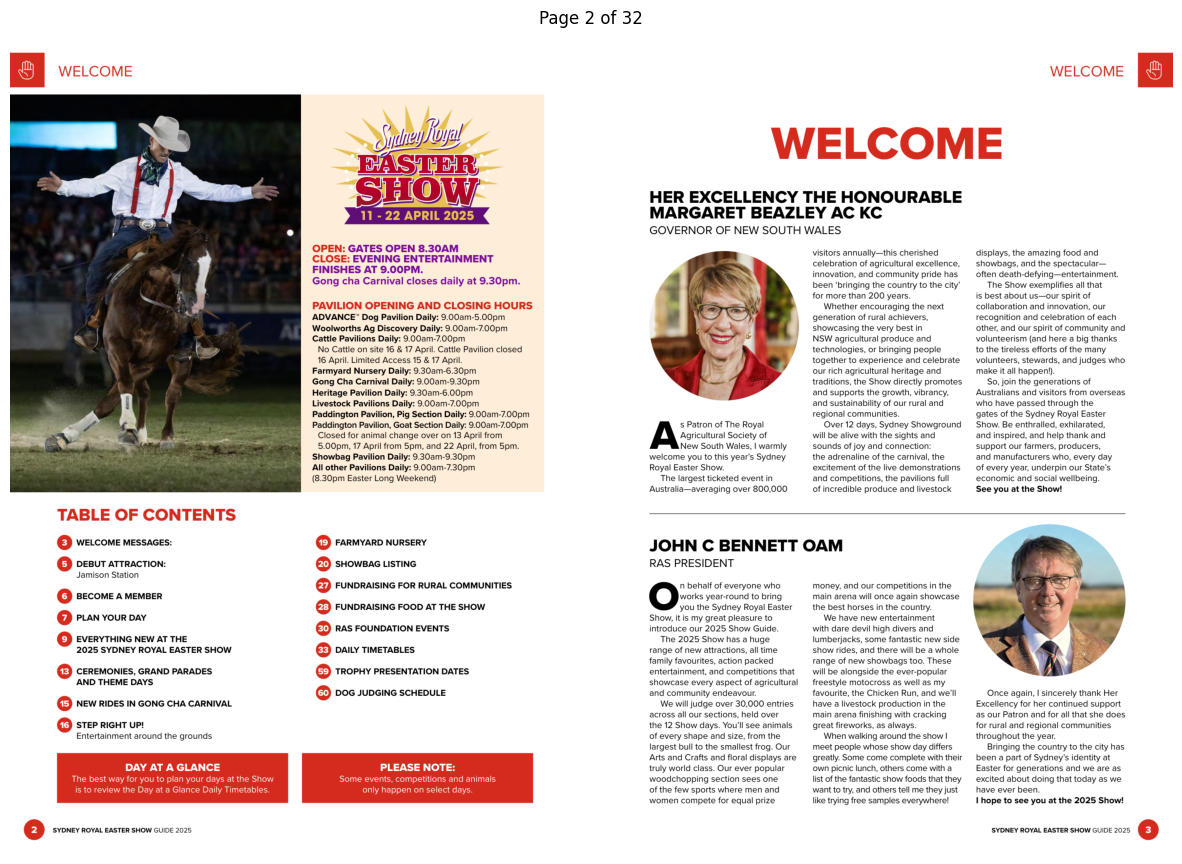

32

In [11]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
import io

def view_pdf(file_path, page_num=0, zoom=2):
    """
    Display a page from a PDF file and report total page count.
    
    Parameters:
    -----------
    file_path : str
        Path to the PDF file
    page_num : int, optional
        Page number to display (0-indexed) (default: 0)
    zoom : float, optional
        Zoom factor for rendering (default: 2)
    
    Returns:
    --------
    int
        Total number of pages in the PDF
    """
    try:
        # Open the PDF
        doc = fitz.open(file_path)
        
        # Get total number of pages
        total_pages = len(doc)
        
        # Print page information
        print(f"PDF Information:")
        print(f"• Filename: {file_path.split('/')[-1]}")
        print(f"• Total pages: {total_pages}")
        
        # Check if requested page exists
        if page_num >= total_pages:
            print(f"Warning: Requested page {page_num+1} exceeds document length. Showing the last page instead.")
            page_num = total_pages - 1
        elif page_num < 0:
            print(f"Warning: Negative page number. Showing the first page instead.")
            page_num = 0
        
        # Load the page
        page = doc.load_page(page_num)
        
        # Print current page
        print(f"• Displaying: Page {page_num+1} of {total_pages}")
        
        # Get page dimensions
        width, height = page.rect.width, page.rect.height
        print(f"• Page dimensions: {width:.1f} x {height:.1f} points")
        
        # Render page to an image
        pix = page.get_pixmap(matrix=fitz.Matrix(zoom, zoom))
        
        # Convert pixmap to an image
        img_bytes = io.BytesIO(pix.tobytes("png"))
        
        # Display the image
        plt.figure(figsize=(15, 15))
        plt.imshow(plt.imread(img_bytes))
        plt.axis('off')
        plt.title(f"Page {page_num + 1} of {total_pages}")
        plt.show()
        
        # Close the document
        doc.close()
        
        return total_pages
    
    except Exception as e:
        print(f"Error: {e}")
        return 0

# Function to display a specific page with navigation help
def browse_pdf(file_path, zoom=2):
    """
    Interactive function to browse PDF pages. This function will display
    the first page and provide guidance on viewing other pages.
    
    Parameters:
    -----------
    file_path : str
        Path to the PDF file
    zoom : float, optional
        Zoom factor for rendering (default: 2)
    """
    # Show the first page and get total pages
    total_pages = view_pdf(file_path, page_num=0, zoom=zoom)
    
    if total_pages > 1:
        print("\nNavigation Help:")
        print("To view other pages, call the view_pdf function with the desired page number:")
        print(f"view_pdf(\"{file_path}\", page_num=X)")
        print("Where X is the page number (0-indexed) you want to view")
        print(f"Valid page numbers for this document: 0 to {total_pages-1}")
    
    return total_pages

# Example usage:
# total_pages = view_pdf("path/to/your/file.pdf")  # View first page (default)
view_pdf("../data/show-guide-2025.pdf", page_num=1)    # View page 6 (0-indexed)
# browse_pdf("path/to/your/file.pdf")              # Start browsing from page 1